# Some Important Points: 🔋 


1.   V(max) = 4.2 volt
2.   V(min) = 2.8/2.7 Volt
3.   Nominal Charge capacity = 2500 mA/2.5Ah 
4.   SOC = Normal Capacity at that point/Nominal capacity
5.   Nominal Capacity - ammount of charged deliverd by fully charge batter, when it is fresh. OR **we can say Total capacity of battery.**
6.   SOH = Maximum of SOC at one cycle.
7.   we can find SOH by making set of loops in dataset and then find max(SOC).


# Models 📌


1.   (DNN) Deep Neural Network 
2.   LSTM
3.   CNN
4.   GPR (Gaussian Progress Rregressor)
5.   Genetic Algorithms
6.   Support Vector Regressor
7.   Random Forest



# Model Partitioning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Reading the data
df = pd.read_csv("trial1.csv")
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C,Capacity/Ah,Nominal_Capacity/Ah
0,0.4,3.54,1.25,0.00,0.0,2.5
1,1.0,3.54,1.25,0.95,0.0,2.5
2,2.0,3.54,1.25,2.28,0.0,2.5
3,3.0,3.55,1.25,3.46,0.0,2.5
4,4.0,3.55,1.25,4.64,0.0,2.5


In [3]:
df.rename(columns= {'Time/sec':'Time', 'Potential/V':'Potential', 'Current/A':'Current', 'Charge/C':'Charge',
                    'Capacity/Ah':'Capacity', 'Nominal_Capacity/Ah':'Nominal_Capacity'},inplace=True)

In [4]:
df.insert(loc = 6,column ='SOC',value=df['Capacity']/df['Nominal_Capacity']) 

In [5]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC
0,0.4,3.54,1.25,0.00,0.0,2.5,0.0
1,1.0,3.54,1.25,0.95,0.0,2.5,0.0
2,2.0,3.54,1.25,2.28,0.0,2.5,0.0
3,3.0,3.55,1.25,3.46,0.0,2.5,0.0
4,4.0,3.55,1.25,4.64,0.0,2.5,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   SOC               242885 non-null  float64
dtypes: float64(7)
memory usage: 13.0 MB


In [7]:
df.isnull().sum()

Time                0
Potential           0
Current             0
Charge              0
Capacity            0
Nominal_Capacity    0
SOC                 0
dtype: int64

In [8]:
df.describe()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC
count,242885.000000,242885.000000,242885.000000,242885.000000,242885.000000,242885.0,242885.000000
mean,124950.840426,3.839404,0.034547,5083.012369,1.412284,2.5,0.564913
std,72231.050997,0.385144,1.234725,3185.178306,0.884470,0.0,0.353788
min,0.400000,2.750000,-2.500000,0.000000,0.000000,2.5,0.000000
25%,62490.800000,3.440000,0.000000,1920.000000,0.530000,2.5,0.212000
50%,124983.000000,3.940000,0.080000,5790.000000,1.610000,2.5,0.644000
75%,187475.100000,4.200000,1.250000,8280.000000,2.300000,2.5,0.920000
max,249967.200000,4.200000,1.260000,8680.000000,2.410000,2.5,0.964000


# Normalizing the Values 

In [9]:
callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 10,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Charge','SOC'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [11]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC
0,0.000000,0.544828,0.99734,0.000000,0.0,2.5,0.0
1,0.000002,0.544828,0.99734,0.000109,0.0,2.5,0.0
2,0.000006,0.544828,0.99734,0.000263,0.0,2.5,0.0
3,0.000010,0.551724,0.99734,0.000399,0.0,2.5,0.0
4,0.000014,0.551724,0.99734,0.000535,0.0,2.5,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   SOC               242885 non-null  float64
dtypes: float64(7)
memory usage: 13.0 MB


# Spliting the Data into train and test

In [13]:
Y = df.pop('Capacity')
X = df

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [15]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((194308, 6), (48577, 6), (194308,), (48577,))

In [16]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

# DNN

## Model 1
Normal Deep earning neural network
with 3 layers and relu activation

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='relu'),
                               tf.keras.layers.Dense(20, activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["mae"])

history_1 = model_1.fit(X_train,Y_train, epochs= 200,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/200
6073/6073 [==============================] - 19s 3ms/step - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0077 - val_mae: 0.0077
Epoch 2/200
6073/6073 [==============================] - 17s 3ms/step - loss: 0.0058 - mae: 0.0058 - val_loss: 0.0061 - val_mae: 0.0061
Epoch 3/200
6073/6073 [==============================] - 19s 3ms/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0039 - val_mae: 0.0039
Epoch 4/200
6073/6073 [==============================] - 18s 3ms/step - loss: 0.0046 - mae: 0.0046 - val_loss: 0.0044 - val_mae: 0.0044
Epoch 5/200
6073/6073 [==============================] - 17s 3ms/step - loss: 0.0045 - mae: 0.0045 - val_loss: 0.0062 - val_mae: 0.0062
Epoch 6/200
6073/6073 [==============================] - 18s 3ms/step - loss: 0.0039 - mae: 0.0039 - val_loss: 0.0016 - val_mae: 0.0016
Epoch 7/200
6073/6073 [==============================] - 18s 3ms/step - loss: 0.0039 - mae: 0.0039 - val_loss: 0.0029 - val_mae: 0.0029
Epoch 8/200
6073/6073 [=========================

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                350       
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,391
Trainable params: 1,391
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.evaluate(X_test,Y_test)

1519/1519 [==============================] - 3s 2ms/step - loss: 0.0028 - mae: 0.0028


[0.0028312625363469124, 0.0028312625363469124]

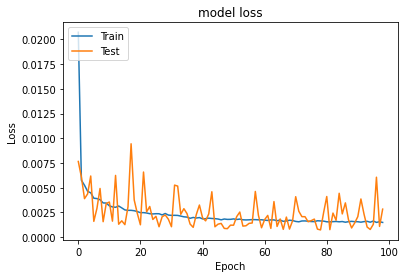

In [ ]:
plot_his(history_1)

In [ ]:
prediction = model_1.predict(X_test)
print(prediction[:10])

1519/1519 [==============================] - 2s 1ms/step
[[2.262327  ]
 [1.6217018 ]
 [0.10328673]
 [1.7737232 ]
 [2.4128158 ]
 [0.09295353]
 [1.9136609 ]
 [1.3911935 ]
 [1.8221134 ]
 [2.3118126 ]]


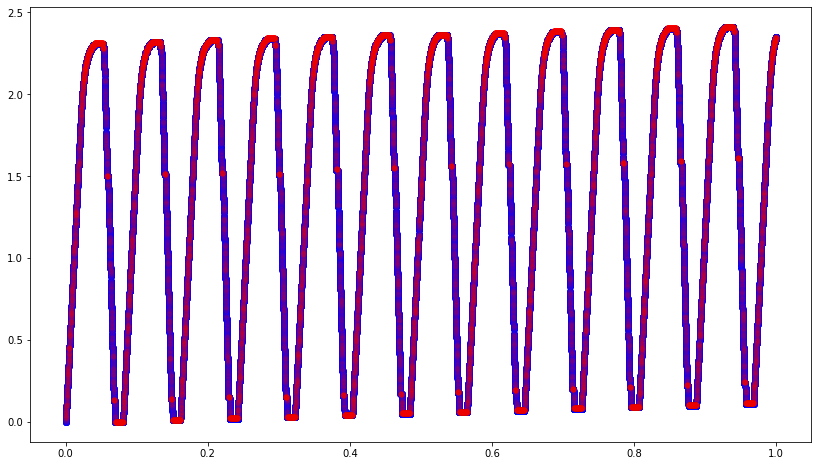

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction,color='red',alpha=0.05,linewidths=0.02)
plt.show()

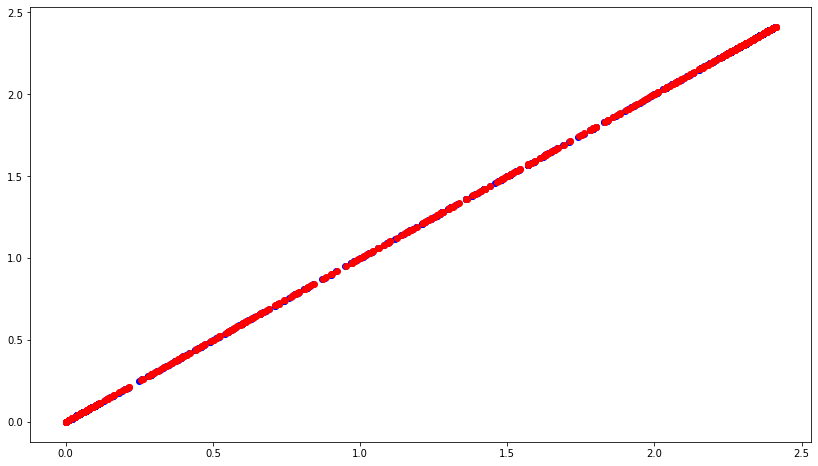

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction[300:900], prediction[300:900], color='red')
plt.show()

## Model_1_1

In [ ]:
tf.random.set_seed(42)

model__1_1 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='relu'),
                                  tf.keras.layers.Dense(30, activation='relu'),
                                  tf.keras.layers.Dense(10, activation = 'relu'),
                                  tf.keras.layers.Dense(1)])

model__1_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["mae",'mse'])

#here using callback feature
history_1_1 = model__1_1.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0172 - mae: 0.0172 - mse: 0.0096 - val_loss: 0.0023 - val_mae: 0.0023 - val_mse: 9.5833e-06
Epoch 2/100
6073/6073 [==============================] - 20s 3ms/step - loss: 0.0064 - mae: 0.0064 - mse: 6.8067e-05 - val_loss: 0.0034 - val_mae: 0.0034 - val_mse: 1.6848e-05
Epoch 3/100
6073/6073 [==============================] - 20s 3ms/step - loss: 0.0054 - mae: 0.0054 - mse: 4.8831e-05 - val_loss: 0.0033 - val_mae: 0.0033 - val_mse: 1.4400e-05
Epoch 4/100
6073/6073 [==============================] - 20s 3ms/step - loss: 0.0050 - mae: 0.0050 - mse: 4.1114e-05 - val_loss: 0.0019 - val_mae: 0.0019 - val_mse: 5.7908e-06
Epoch 5/100
6073/6073 [==============================] - 19s 3ms/step - loss: 0.0050 - mae: 0.0050 - mse: 4.3876e-05 - val_loss: 0.0022 - val_mae: 0.0022 - val_mse: 7.6506e-06
Epoch 6/100
6073/6073 [==============================] - 20s 3ms/step - loss: 0.0045 - mae: 0.0045 - mse: 3.4306e-05 - val_l

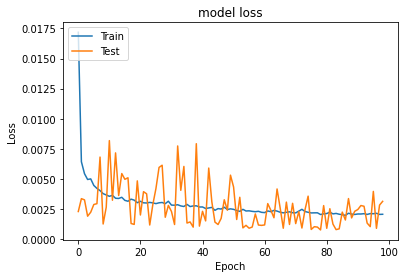

In [ ]:
plot_his(history_1_1)

In [ ]:
prediction_1_1 = model__1_1.predict(X_test)
print(prediction_1_1[:10])

1519/1519 [==============================] - 2s 1ms/step
[[2.2640636 ]
 [1.62339   ]
 [0.10064343]
 [1.774422  ]
 [2.4149017 ]
 [0.09022593]
 [1.9153459 ]
 [1.3930659 ]
 [1.8246545 ]
 [2.3140993 ]]


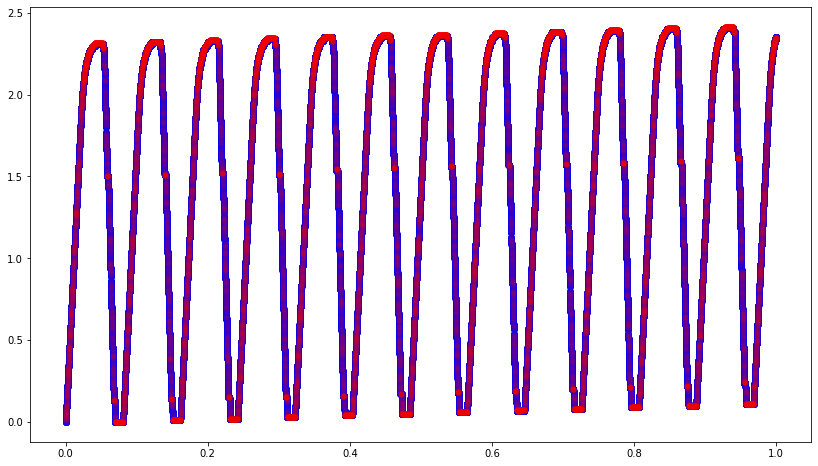

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_1_1,color='red',alpha=0.05,linewidths=0.02)
plt.show()

# LSTM
LSTM ( Long short term memory)


## Model 2

In [ ]:
%%time
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'relu',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['mae'])

history_2 = model_2.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/30
6073/6073 [==============================] - 46s 7ms/step - loss: 0.0417 - mae: 0.0417 - val_loss: 0.0084 - val_mae: 0.0084
Epoch 2/30
6073/6073 [==============================] - 44s 7ms/step - loss: 0.0117 - mae: 0.0117 - val_loss: 0.0039 - val_mae: 0.0039
Epoch 3/30
6073/6073 [==============================] - 44s 7ms/step - loss: 0.0098 - mae: 0.0098 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 4/30
6073/6073 [==============================] - 44s 7ms/step - loss: 0.0083 - mae: 0.0083 - val_loss: 0.0078 - val_mae: 0.0078
Epoch 5/30
6073/6073 [==============================] - 44s 7ms/step - loss: 0.0075 - mae: 0.0075 - val_loss: 0.0121 - val_mae: 0.0121
Epoch 6/30
6073/6073 [==============================] - 44s 7ms/step - loss: 0.0069 - mae: 0.0069 - val_loss: 0.0025 - val_mae: 0.0025
Epoch 7/30
6073/6073 [==============================] - 44s 7ms/step - loss: 0.0061 - mae: 0.0061 - val_loss: 0.0059 - val_mae: 0.0059
Epoch 8/30
6073/6073 [==============================] -

In [ ]:
model_2.evaluate(X_test,Y_test)

1519/1519 [==============================] - 4s 2ms/step - loss: 0.0037 - mae: 0.0037


[0.0037212499883025885, 0.0037212499883025885]

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6, 50)             10400     
                                                                 
 lstm_5 (LSTM)               (None, 10)                2440      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


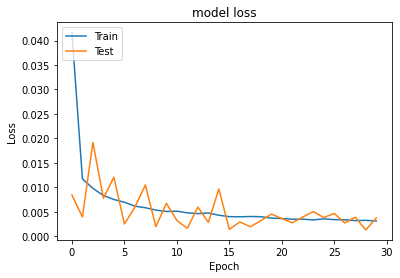

In [ ]:
plot_his(history_2)

In [ ]:
prediction_2 = model_2.predict(X_test)
print(prediction_2[:20])

1519/1519 [==============================] - 4s 2ms/step
[[1.9166039 ]
 [1.7070038 ]
 [0.29413962]
 [2.337483  ]
 [0.04567868]
 [2.1672838 ]
 [0.4134255 ]
 [2.3274431 ]
 [2.3275206 ]
 [1.3058554 ]
 [1.2667785 ]
 [2.2373729 ]
 [2.3274786 ]
 [2.3067243 ]
 [0.06610116]
 [0.8557084 ]
 [0.8249166 ]
 [2.317112  ]
 [2.0577686 ]
 [2.17688   ]]


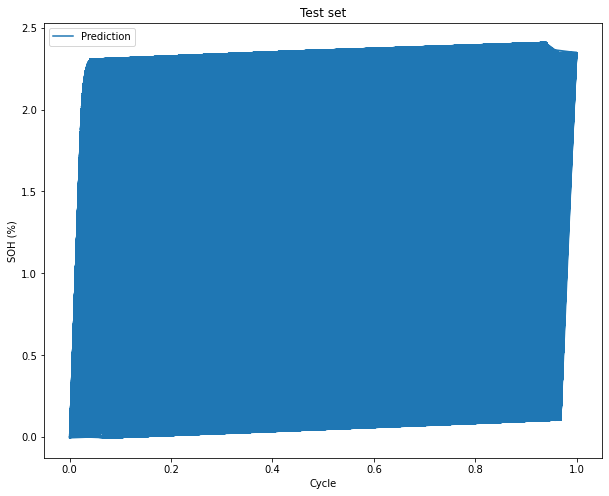

In [ ]:
# plt.figure(figsize=(10, 8))
# plt.title('Test set')
# plt.xlabel('Cycle')
# plt.ylabel('SOH (%)')
# plt.plot(X_test['Time'],prediction_2,label='Prediction')
# plt.plot(X_test['Time'],Y_test,label='Actual')
# plt.legend()

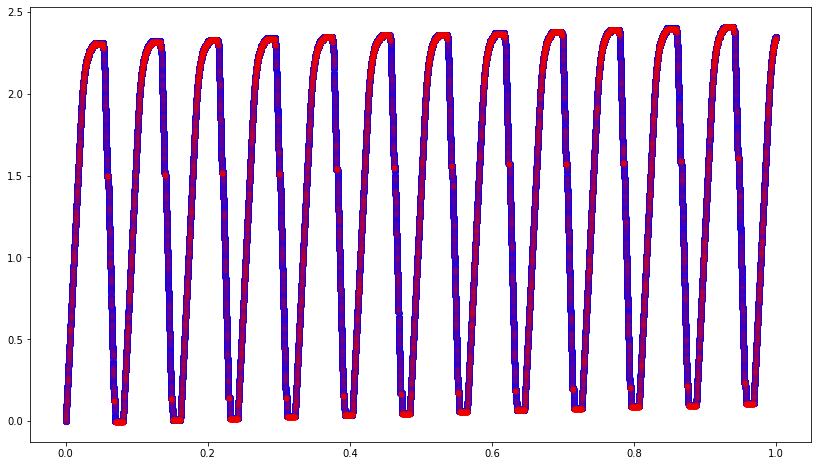

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_2,color='red',alpha=0.05,linewidths=0.02)
plt.show()

## Model 3
Best

In [ ]:
%%time
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'relu',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['mae'])

history_3 = model_3.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
6073/6073 [==============================] - 59s 9ms/step - loss: 0.0405 - mae: 0.0405 - val_loss: 0.0137 - val_mae: 0.0137
Epoch 2/40
6073/6073 [==============================] - 56s 9ms/step - loss: 0.0136 - mae: 0.0136 - val_loss: 0.0200 - val_mae: 0.0200
Epoch 3/40
6073/6073 [==============================] - 56s 9ms/step - loss: 0.0111 - mae: 0.0111 - val_loss: 0.0071 - val_mae: 0.0071
Epoch 4/40
6073/6073 [==============================] - 57s 9ms/step - loss: 0.0093 - mae: 0.0093 - val_loss: 0.0093 - val_mae: 0.0093
Epoch 5/40
6073/6073 [==============================] - 57s 9ms/step - loss: 0.0083 - mae: 0.0083 - val_loss: 0.0087 - val_mae: 0.0087
Epoch 6/40
6073/6073 [==============================] - 58s 9ms/step - loss: 0.0074 - mae: 0.0074 - val_loss: 0.0059 - val_mae: 0.0059
Epoch 7/40
6073/6073 [==============================] - 56s 9ms/step - loss: 0.0070 - mae: 0.0070 - val_loss: 0.0093 - val_mae: 0.0093
Epoch 8/40
6073/6073 [==============================] -

In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


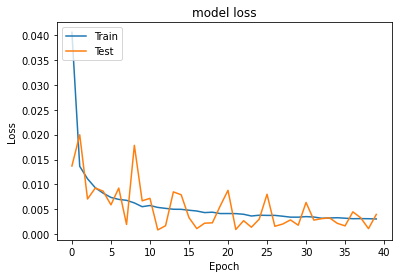

In [ ]:
plot_his(history_3)

In [ ]:
%%time
model_3.evaluate(X_test,Y_test)

1519/1519 [==============================] - 5s 3ms/step - loss: 0.0040 - mae: 0.0040
CPU times: user 6.37 s, sys: 271 ms, total: 6.64 s
Wall time: 5.17 s


[0.003995843697339296, 0.003995843697339296]

In [ ]:
prediction_3 = model_3.predict(X_test)

1519/1519 [==============================] - 5s 3ms/step


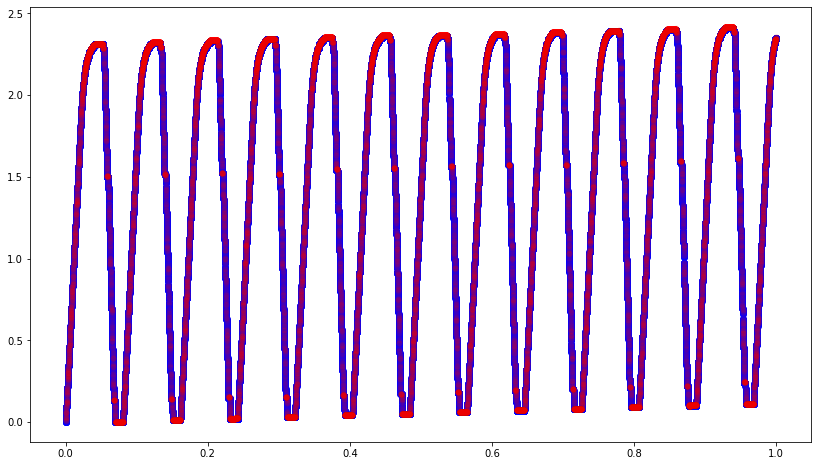

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_3,color='red',alpha=0.05,linewidths=0.02)
plt.show()

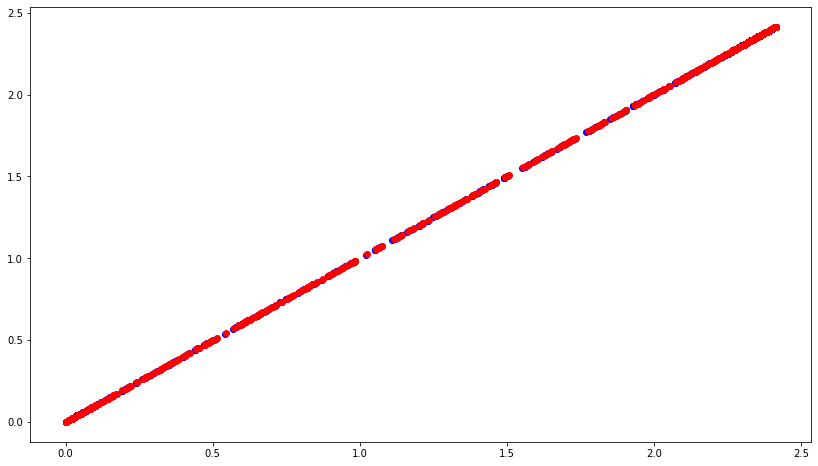

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_3[300:900], prediction_3[300:900], color='red')
plt.show()

# CNN

## Model 4
CNN

In [ ]:
%%time
model_4 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='relu',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mae'])

history_4 = model_4.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
6073/6073 [==============================] - 16s 2ms/step - loss: 0.0230 - mae: 0.0230 - val_loss: 0.0077 - val_mae: 0.0077
Epoch 2/50
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0046 - mae: 0.0046 - val_loss: 0.0057 - val_mae: 0.0057
Epoch 3/50
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0043 - mae: 0.0043 - val_loss: 0.0037 - val_mae: 0.0037
Epoch 4/50
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0043 - mae: 0.0043 - val_loss: 0.0063 - val_mae: 0.0063
Epoch 5/50
6073/6073 [==============================] - 15s 2ms/step - loss: 0.0042 - mae: 0.0042 - val_loss: 0.0066 - val_mae: 0.0066
Epoch 6/50
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0042 - mae: 0.0042 - val_loss: 0.0049 - val_mae: 0.0049
Epoch 7/50
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0040 - mae: 0.0040 - val_loss: 0.0047 - val_mae: 0.0047
Epoch 8/50
6073/6073 [==============================] -

In [ ]:
model_4.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 0.0029 - mae: 0.0029


[0.0028616278432309628, 0.0028616278432309628]

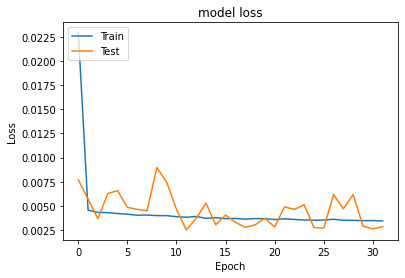

In [ ]:
plot_his(history_4)

In [ ]:
prediction_4 = model_4.predict(X_test)

1519/1519 [==============================] - 2s 1ms/step


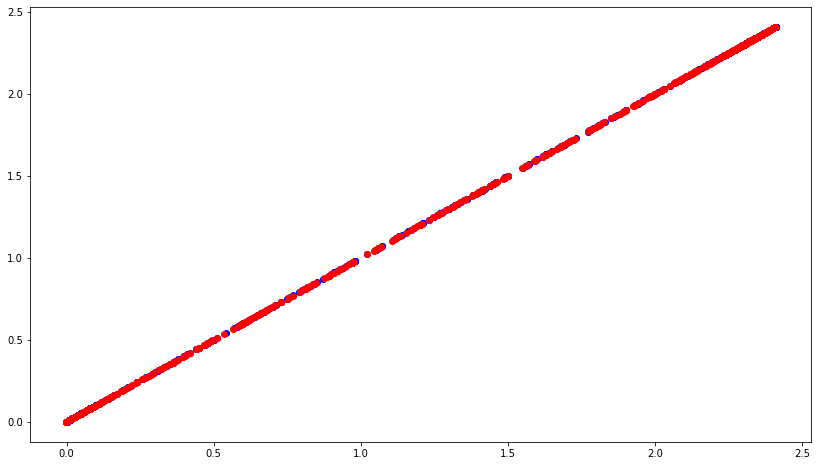

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_4[300:900], prediction_4[300:900], color='red')
plt.show()

## Model 5 (Best)

In [ ]:
%%time
model_5 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='relu',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=['mae'])

history_5 = model_5.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 18s 3ms/step - loss: 0.0152 - mae: 0.0152 - val_loss: 0.0026 - val_mae: 0.0026
Epoch 2/100
6073/6073 [==============================] - 17s 3ms/step - loss: 0.0038 - mae: 0.0038 - val_loss: 0.0031 - val_mae: 0.0031
Epoch 3/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0032 - mae: 0.0032 - val_loss: 0.0034 - val_mae: 0.0034
Epoch 4/100
6073/6073 [==============================] - 20s 3ms/step - loss: 0.0030 - mae: 0.0030 - val_loss: 0.0039 - val_mae: 0.0039
Epoch 5/100
6073/6073 [==============================] - 16s 3ms/step - loss: 0.0028 - mae: 0.0028 - val_loss: 0.0023 - val_mae: 0.0023
Epoch 6/100
6073/6073 [==============================] - 20s 3ms/step - loss: 0.0027 - mae: 0.0027 - val_loss: 0.0030 - val_mae: 0.0030
Epoch 7/100
6073/6073 [==============================] - 27s 4ms/step - loss: 0.0025 - mae: 0.0025 - val_loss: 0.0024 - val_mae: 0.0024
Epoch 8/100
6073/6073 [=========================

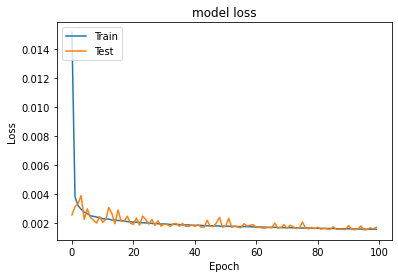

In [ ]:
plot_his(history_5)

In [ ]:
model_5.evaluate(X_test,Y_test)

1519/1519 [==============================] - 3s 2ms/step - loss: 0.0017 - mae: 0.0017


[0.0017177871195599437, 0.0017177871195599437]

In [ ]:
prediction_5 = model_5.predict(X_test)

1519/1519 [==============================] - 3s 2ms/step


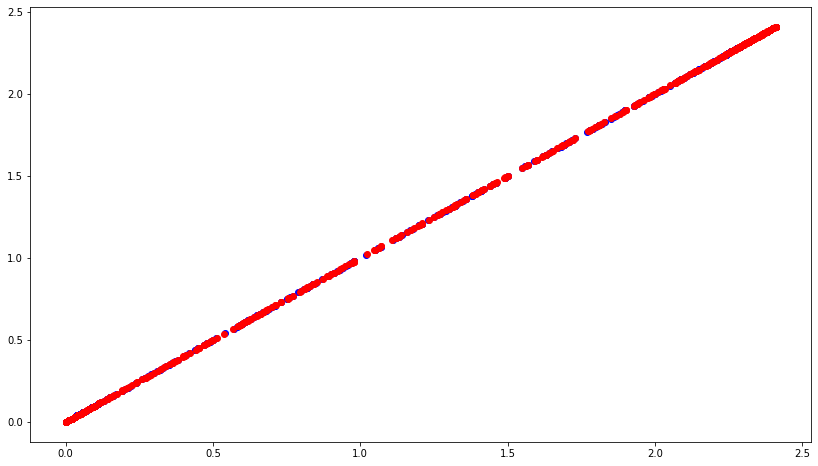

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_5[300:900], prediction_5[300:900], color='red')
plt.show()

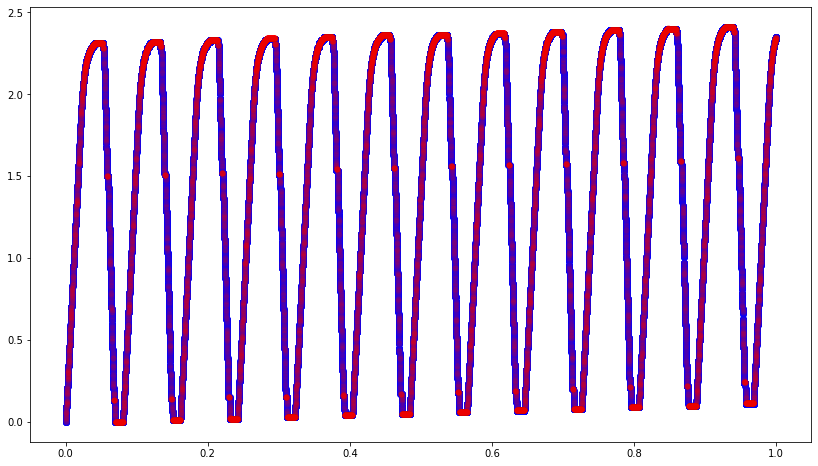

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_5,color='red',alpha=0.05,linewidths=0.02)
plt.show()

## Model 6

In [ ]:
%%time
model_6 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='relu',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(16,activation="linear"),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005,decay=0.001),
                metrics=['mae'])

history_6 = model_6.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0032 - val_mae: 0.0032
Epoch 2/100
6073/6073 [==============================] - 32s 5ms/step - loss: 0.0031 - mae: 0.0031 - val_loss: 0.0030 - val_mae: 0.0030
Epoch 3/100
6073/6073 [==============================] - 22s 4ms/step - loss: 0.0029 - mae: 0.0029 - val_loss: 0.0028 - val_mae: 0.0028
Epoch 4/100
6073/6073 [==============================] - 22s 4ms/step - loss: 0.0028 - mae: 0.0028 - val_loss: 0.0030 - val_mae: 0.0030
Epoch 5/100
6073/6073 [==============================] - 18s 3ms/step - loss: 0.0028 - mae: 0.0028 - val_loss: 0.0027 - val_mae: 0.0027
Epoch 6/100
6073/6073 [==============================] - 18s 3ms/step - loss: 0.0027 - mae: 0.0027 - val_loss: 0.0027 - val_mae: 0.0027
Epoch 7/100
6073/6073 [==============================] - 19s 3ms/step - loss: 0.0027 - mae: 0.0027 - val_loss: 0.0027 - val_mae: 0.0027
Epoch 8/100
6073/6073 [=========================

In [ ]:
model_6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 4, 10)             40        
                                                                 
 conv1d_21 (Conv1D)          (None, 3, 10)             210       
                                                                 
 flatten_10 (Flatten)        (None, 30)                0         
                                                                 
 dense_23 (Dense)            (None, 16)                496       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 763
Trainable params: 763
Non-trainable params: 0
_________________________________________________________________


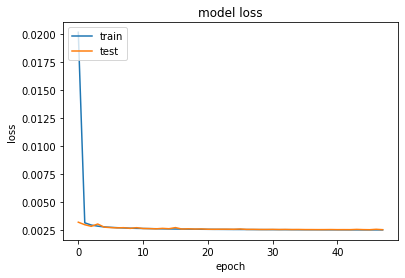

In [ ]:
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1519/1519 [==============================] - 2s 1ms/step


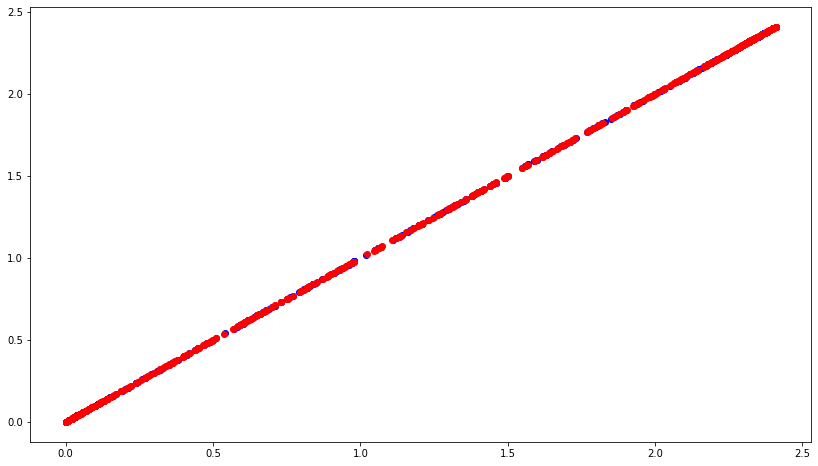

In [ ]:
prediction_6 = model_6.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_6[300:900], prediction_6[300:900], color='red')
plt.show()

## Model 7 (Best)

In [ ]:
%%time
model_7 = tf.keras.Sequential([tf.keras.layers.Conv1D(64,3,activation='relu',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(32,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="relu"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['mae'])

history_7 = model_7.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/100
6073/6073 [==============================] - 31s 4ms/step - loss: 0.0544 - mae: 0.0544 - val_loss: 0.0065 - val_mae: 0.0065
Epoch 2/100
6073/6073 [==============================] - 22s 4ms/step - loss: 0.0028 - mae: 0.0028 - val_loss: 0.0054 - val_mae: 0.0054
Epoch 3/100
6073/6073 [==============================] - 22s 4ms/step - loss: 0.0027 - mae: 0.0027 - val_loss: 0.0022 - val_mae: 0.0022
Epoch 4/100
6073/6073 [==============================] - 22s 4ms/step - loss: 0.0027 - mae: 0.0027 - val_loss: 0.0021 - val_mae: 0.0021
Epoch 5/100
6073/6073 [==============================] - 22s 4ms/step - loss: 0.0027 - mae: 0.0027 - val_loss: 0.0021 - val_mae: 0.0021
Epoch 6/100
6073/6073 [==============================] - 25s 4ms/step - loss: 0.0026 - mae: 0.0026 - val_loss: 0.0022 - val_mae: 0.0022
Epoch 7/100
6073/6073 [==============================] - 22s 4ms/step - loss: 0.0025 - mae: 0.0025 - val_loss: 0.0023 - val_mae: 0.0023
Epoch 8/100
6073/6073 [=========================

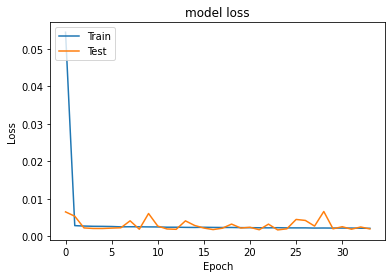

In [ ]:
plot_his(history_7)

1519/1519 [==============================] - 2s 1ms/step


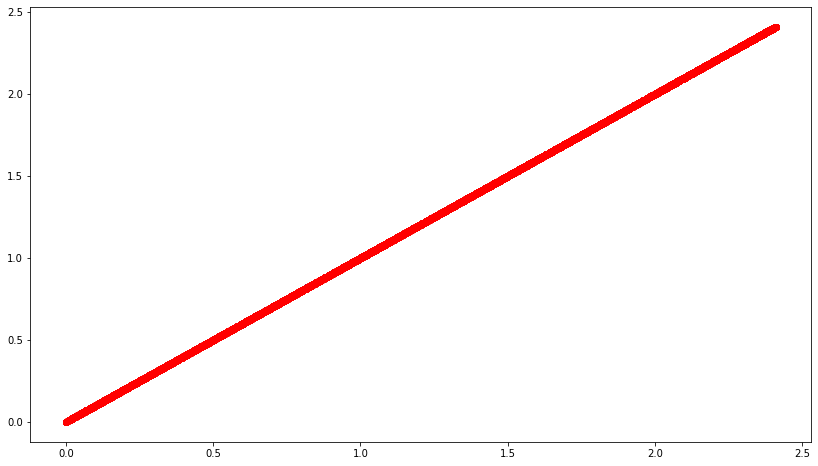

In [ ]:
prediction_7 = model_7.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test, Y_test, color='blue')
plt.scatter(prediction_7, prediction_7, color='red')
plt.show()

## Model 8 (Best)

In [21]:
%%time
model_8 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='relu',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(16,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=['mae'])

history_8 = model_8.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 22s 3ms/step - loss: 0.0114 - mae: 0.0114 - val_loss: 0.0023 - val_mae: 0.0023
Epoch 2/100
6073/6073 [==============================] - 21s 4ms/step - loss: 0.0036 - mae: 0.0036 - val_loss: 0.0018 - val_mae: 0.0018
Epoch 3/100
6073/6073 [==============================] - 21s 4ms/step - loss: 0.0029 - mae: 0.0029 - val_loss: 0.0042 - val_mae: 0.0042
Epoch 4/100
6073/6073 [==============================] - 24s 4ms/step - loss: 0.0025 - mae: 0.0025 - val_loss: 0.0020 - val_mae: 0.0020
Epoch 5/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0023 - mae: 0.0023 - val_loss: 0.0044 - val_mae: 0.0044
Epoch 6/100
6073/6073 [==============================] - 21s 3ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0026 - val_mae: 0.0026
Epoch 7/100
6073/6073 [==============================] - 24s 4ms/step - loss: 0.0021 - mae: 0.0021 - val_loss: 0.0023 - val_mae: 0.0023
Epoch 8/100
6073/6073 [=========================

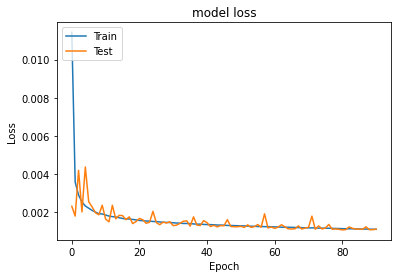

In [23]:
plot_his(history_8)

# GPR
GAUSSIAN PROCESS REGRESSION
link - https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

Link_1 = https://www.kaggle.com/discussions/questions-and-answers/47716

Link_2 = https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

Link_3 = https://www.kaggle.com/code/sterby/gaussian-process-regression-benchmark


# SVR
Support vector regressor

In [24]:
from sklearn.svm import SVR, LinearSVR

In [25]:
svr = SVR().fit(X, Y)
print(svr)

SVR()


In [26]:
y_pred_svr = svr.predict(X)

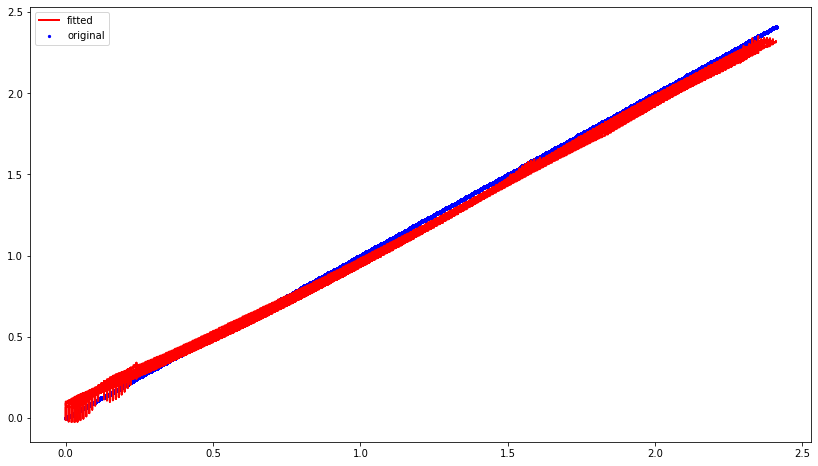

In [27]:
plt.figure(figsize=(14,8))
plt.scatter(Y, Y, s=5, color="blue", label="original")
plt.plot(Y, y_pred_svr, lw=2, color="red", label="fitted")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_5,color='red',alpha=0.05,linewidths=0.02)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
score = svr.score(X,Y)
print("R-squared:", score)
print("MSE:", mean_squared_error(Y, y_pred_svr))

R-squared: 0.9971697064502795
MSE: 0.002214091055829046


In [29]:
kernel = ['linear','rbf']        # For both the kernel
for i in kernel:
  model = SVR(kernel=i,C=1.0)
  model.fit(X_train,Y_train)
  print(f"For Kernel {i}")
  print("Accuracy is :", model.score(X_test,Y_test))

For Kernel linear
Accuracy is : 0.994271468811698
For Kernel rbf
Accuracy is : 0.9972224769296364


# RandomForest

link_1 = https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [31]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)

In [32]:
rf.score(X_test,Y_test)

0.9999999977159226

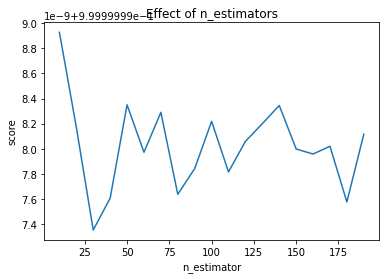

In [33]:
model = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [34]:
for i in scores:
  print(f"score is : {i}")

score is : 0.9999999989254484
score is : 0.9999999981719518
score is : 0.999999997355846
score is : 0.9999999976084675
score is : 0.9999999983499082
score is : 0.9999999979732035
score is : 0.9999999982900242
score is : 0.9999999976395902
score is : 0.999999997843455
score is : 0.9999999982186032
score is : 0.9999999978171072
score is : 0.9999999980598374
score is : 0.9999999981999826
score is : 0.9999999983452494
score is : 0.9999999979995285
score is : 0.9999999979591095
score is : 0.9999999980207538
score is : 0.999999997578538
score is : 0.9999999981163947


In [36]:
print("hj")

hj
